In [1]:
                                                                                                                                                                                                                     # To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals
from __future__ import division, print_function, unicode_literals

import os
import os.path
import scipy.io.wavfile
import math
import matplotlib.pyplot as plt
import numpy as np
import wave
import sys
from matplotlib.pyplot import figure
import soundfile as sf
import scipy.signal as signal
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.metrics import average_precision_score
%matplotlib inline

import tensorflow as tf
import sklearn 
from sklearn import preprocessing

import os
from os.path import isdir, join
from pathlib import Path
import pandas as pd

# Math
import numpy as np
from scipy.fftpack import fft
from scipy import signal
from scipy.io import wavfile
import librosa

from sklearn.decomposition import PCA

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import IPython.display as ipd
import librosa.display

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import pandas as pd

%matplotlib inline


# Common imports
## Mass display waves
import os
import os.path
import scipy.io.wavfile
import math
import matplotlib.pyplot as plt
import numpy as np
import wave
import sys
from matplotlib.pyplot import figure
import soundfile as sf
import scipy.signal as signal
from tempfile import TemporaryFile
from sklearn.metrics import roc_auc_score

%matplotlib inline

import numpy as np
import os

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)


%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)
    
    
# 465-(270,180000)

from sklearn.externals import joblib
import pickle

       
%matplotlib inline

import pickle as pkl
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
'''

## PLOT SPECTROGRAM FOR VIZ.

'''
import numpy as np
from matplotlib import pyplot as plt
import scipy.io.wavfile as wav
from numpy.lib import stride_tricks

""" short time fourier transform of audio signal """
def stft(sig, frameSize, overlapFac=0.5, window=np.hanning):
    win = window(frameSize)
    hopSize = int(frameSize - np.floor(overlapFac * frameSize))

    # zeros at beginning (thus center of 1st window should be for sample nr. 0)   
    samples = np.append(np.zeros(int(np.floor(frameSize/2.0))), sig)    
    # cols for windowing
    cols = np.ceil( (len(samples) - frameSize) / float(hopSize)) + 1
    # zeros at end (thus samples can be fully covered by frames)
    samples = np.append(samples, np.zeros(frameSize))

    frames = stride_tricks.as_strided(samples, shape=(int(cols), frameSize), strides=(samples.strides[0]*hopSize, samples.strides[0])).copy()
    frames *= win

    return np.fft.rfft(frames)    

""" scale frequency axis logarithmically """    
def logscale_spec(spec, sr=22050, factor=20.):
    timebins, freqbins = np.shape(spec)

    scale = np.linspace(0, 1, freqbins) ** factor
    scale *= (freqbins-1)/max(scale)
    scale = np.unique(np.round(scale))

    # create spectrogram with new freq bins
    newspec = np.complex128(np.zeros([timebins, len(scale)]))
    for i in range(0, len(scale)):        
        if i == len(scale)-1:
            newspec[:,i] = np.sum(spec[:,int(scale[i]):], axis=1)
        else:        
            newspec[:,i] = np.sum(spec[:,int(scale[i]):int(scale[i+1])], axis=1)

    # list center freq of bins
    allfreqs = np.abs(np.fft.fftfreq(freqbins*2, 1./sr)[:freqbins+1])
    freqs = []
    for i in range(0, len(scale)):
        if i == len(scale)-1:
            freqs += [np.mean(allfreqs[int(scale[i]):])]
        else:
            freqs += [np.mean(allfreqs[int(scale[i]):int(scale[i+1])])]

    return newspec, freqs

""" plot spectrogram"""
def plotstft(samples,samplerate, binsize=2**10, plotpath=None, colormap="jet"):
    #samplerate, samples = wav.read(audiopath)

    s = stft(samples, binsize)

    sshow, freq = logscale_spec(s, factor=1.0, sr=samplerate)

    ims = 20.*np.log10(np.abs(sshow)/10e-6) # amplitude to decibel

    timebins, freqbins = np.shape(ims)

    print("timebins: ", timebins)
    print("freqbins: ", freqbins)

    plt.figure(figsize=(15, 7.5))
    plt.imshow(np.transpose(ims), origin="lower", aspect="auto", cmap=colormap, interpolation="none")
    plt.colorbar()

    plt.xlabel("time (s)")
    plt.ylabel("frequency (hz)")
    plt.xlim([0, timebins-1])
    plt.ylim([0, freqbins])

    xlocs = np.float32(np.linspace(0, timebins-1, 5))
    plt.xticks(xlocs, ["%.02f" % l for l in ((xlocs*len(samples)/timebins)+(0.5*binsize))/samplerate])
    ylocs = np.int16(np.round(np.linspace(0, freqbins-1, 10)))
    plt.yticks(ylocs, ["%.02f" % freq[i] for i in ylocs])

    if plotpath:
        plt.savefig(plotpath, bbox_inches="tight")
    else:
        plt.show()

    plt.clf()

    return ims


/home/sbaligar/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning:

sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.



In [2]:
def lrelu(inputs, alpha=0.2):
    return tf.maximum(alpha * inputs, inputs)


def apply_phaseshuffle(x, rad, pad_type='reflect'):
    b, x_len, nch = x.get_shape().as_list()

    phase = tf.random_uniform([], minval=-rad, maxval=rad + 1, dtype=tf.int32)
    pad_l = tf.maximum(phase, 0)
    pad_r = tf.maximum(-phase, 0)
    phase_start = pad_r
    x = tf.pad(x, [[0, 0], [pad_l, pad_r], [0, 0]], mode=pad_type)
    
    x = x[:, phase_start:phase_start+x_len]
    x.set_shape([b, x_len, nch])

    return x

In [3]:
##### Set trainig set
import os 

n_sam = 2500#36000#40000
training_filenames = []
dir_name = "../tfrec_flute/2in1/"
st_num = "flute"


for file in os.listdir(dir_name):
    if file.endswith(".tfrecords"):
    
        training_filenames.append(os.path.join(dir_name, file))
        
tr_files = training_filenames
print(training_filenames)
print(len(training_filenames))
print("==============================================="*3)


['../tfrec_flute/2in1/001_val_2in1_flute.tfrecords', '../tfrec_flute/2in1/3_1_2in1_flute.tfrecords', '../tfrec_flute/2in1/2_1_2in1_flute.tfrecords', '../tfrec_flute/2in1/6_1_2in1_flute.tfrecords', '../tfrec_flute/2in1/002_val_2in1_flute.tfrecords', '../tfrec_flute/2in1/1_1_2in1_flute.tfrecords', '../tfrec_flute/2in1/5_1_2in1_flute.tfrecords', '../tfrec_flute/2in1/4_1_2in1_flute.tfrecords']
8


In [4]:
# Set validatin set

n_sam_val = 500
val_filenames = []
dir_name = "../tfrec_flute/val/val_flute/"
st_num = "_1"

for file in os.listdir(dir_name):
    #if file.endswith(".tfrecords"):
    if st_num in file:
        
        val_filenames.append(os.path.join(dir_name, file))
        
print(len(val_filenames))
print(val_filenames)


2
['../tfrec_flute/val/val_flute/0_1_2in1_flute.tfrecords', '../tfrec_flute/val/val_flute/7_1_2in1_flute.tfrecords']


In [5]:
# continue here...

b_size =40
# setup the data
reset_graph()
# setup the data

# TRAIINING DATA
print(len(tr_files))


def extract_fn(data_record):
    features = {
        # Extract features using the keys set during creation
        "X": tf.FixedLenFeature([48000], tf.float32),
        #"X":  tf.expand_dims((tf.FixedLenFeature([16000], tf.float32)), 2),
        "Y": tf.FixedLenFeature([48000], tf.float32),
    }
    sample = tf.parse_single_example(data_record, features)
    return  sample["X"], sample["Y"]

def conv1d_transpose(inputs, filters, kernel_width, stride =4, padding ='same', upsample ='zeros'):
    if upsample == 'zeros':
        return tf.layers.conv2d_transpose(
                tf.expand_dims(inputs, axis =1),
                filters, (1, kernel_width), strides = (1, stride),
                padding = 'same'        
                )[:,0]
    elif upsample == 'nn':
        b_size = tf.shape(inputs)[0]
        _, w, nch = inputs.get_shape().as_list()
        
        x = inputs
        x = tf.expand_dims(x, axis = 1)
        x = tf.image.resize_nearest_neighbor(x, [1, w * stride])
        x = x[:, 0]
        
        return tf.layers.conv1d(
            x, filters, kernel_width, 1, padding='same')
    else:
        raise NotImplementedError
        
def lrelu(inputs, alpha=0.2):
    return tf.maximum(alpha * inputs, inputs)        

8


In [6]:

tf.reset_default_graph()

isTrain = tf.placeholder(dtype=tf.bool)
keep_prob_ = tf.placeholder(dtype=tf.float32)

batch_size = tf.placeholder(tf.int64)

filenames = tf.placeholder(tf.string, shape=[None])
dataset = tf.data.TFRecordDataset(filenames)
buffer_size = tf.placeholder(tf.int64)
dataset = dataset.map(extract_fn)  # Parse the record into tensors.

dataset = dataset.repeat()  # Repeat the input indefinitely.
dataset = dataset.batch(batch_size)
dataset = dataset.shuffle(n_sam_val)

iterator = dataset.make_initializable_iterator()

next_element = iterator.get_next()

features = tf.expand_dims(next_element[0], 2)

labels = tf.expand_dims(next_element[1],2)

print("Features SHape:",features.shape)
print("Labels type:", labels.dtype)
print("Labels shape:", labels.shape)

W1025 12:55:17.284078 140124845348608 deprecation.py:323] From <ipython-input-6-8307262cc662>:17: DatasetV1.make_initializable_iterator (from tensorflow.python.data.ops.dataset_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `for ... in dataset:` to iterate over a dataset. If using `tf.estimator`, return the `Dataset` object directly from your input function. As a last resort, you can use `tf.compat.v1.data.make_initializable_iterator(dataset)`.


Features SHape: (?, 48000, 1)
Labels type: <dtype: 'float32'>
Labels shape: (?, 48000, 1)


In [7]:
def model_inputs(real_dim, z_dim, b_size =(40)):
    inputs_real = tf.placeholder(np.float32, shape = (b_size, real_dim,1), name='inputs_real') 
    inputs_z = tf.placeholder(np.float32, shape = (b_size, z_dim,1), name='input_z')
    
    return inputs_real, inputs_z

In [8]:
from keras.layers import Input,Conv1D,MaxPooling1D,UpSampling1D, Flatten, Dense, Reshape
from keras.models import Model
from keras.optimizers import RMSprop
from keras.layers.normalization import BatchNormalization


def generator(z, out_dim, b_size =40, reuse=False, alpha=0.2): #0.01): # size of latent z is 100
    with tf.variable_scope('generator', reuse=reuse):

        print("INPUT:")
        print(z.shape)

        dim_mul = 16

        nch=1
        kernel_len=25  # filter length
        dim=32
        use_batchnorm=False
        upsample='zeros'
        train=False
        str_ide =5

        c1 = tf.layers.conv1d(z, dim, kernel_len, 5, padding='SAME')
        print("Conv1",c1.shape)
        c1 = lrelu(tf.layers.batch_normalization(c1, training=isTrain), 0.2)

        # Layer 1
        # [4096, 64] -> [1024, 128]
        c2 = tf.layers.conv1d(c1, dim * 2, kernel_len, 5, padding='SAME')
        print("Conv2",c2.shape)
        c2 = lrelu(tf.layers.batch_normalization(c2, training=isTrain), 0.2)

        # Layer 2
        # [1024, 128] -> [256, 256]
        c3 = tf.layers.conv1d(c2, dim * 4, kernel_len, 4, padding='SAME')
        print("Conv3",c3.shape)
        c3 = lrelu(tf.layers.batch_normalization(c3, training=isTrain), 0.2)

        # Layer 3
        # [256, 256] -> [64, 512]
        c4 = tf.layers.conv1d(c3, dim * 8, kernel_len, 4, padding='SAME')
        print("Conv4",c4.shape)

        c4 = lrelu(tf.layers.batch_normalization(c4, training=isTrain), 0.2)

        # Layer 4
        # [64, 512] -> [16, 1024]
        c5 = tf.layers.conv1d(c4, dim * 16, kernel_len, 4, padding='SAME')
        print("Conv5",c5.shape)
        c5 = lrelu(tf.layers.batch_normalization(c5, training=isTrain), 0.2)

        '''
        c6 = tf.layers.conv1d(c5, dim * 32, kernel_len, 5, padding='SAME')
        print("Conv6",c6.shape)
        c6 = lrelu(tf.layers.batch_normalization(c6, training=isTrain), 0.2)
        '''
        print("Done with Encoder part..") 
        print(c5.shape)
        print("Commencing Decoder")
        #***************************

        p_sh = c5.shape
        print("HERE>>>",p_sh)
        uni = p_sh[1]*p_sh[2]

        # Flatten and add dropout
        flat = tf.reshape(c5, (b_size, uni))
        print("Flatteded:",flat.shape)
        #***************************


        dim_mul = 32#16

        nch=1
        kernel_len=25  # filter length
        dim=24
        use_batchnorm=False
        upsample='zeros'
        train=False
        z_dim = 16000

        dense0 = tf.layers.dense(flat, 30 * 300)
        dense0 = tf.layers.batch_normalization(dense0, training=isTrain)
        dense0 = tf.nn.dropout(dense0, keep_prob=keep_prob_)
        print("1st Encoded after Dense:", dense0.shape)

        dense0_rsh = tf.reshape(dense0, [b_size, 30, 300])
        dense0_rsh = tf.nn.relu(dense0_rsh)
        print("Size of latent input to generator: ", dense0_rsh.shape)

        '''        
        # 1st Concat Layer
        cCat1= tf.concat([dense0_rsh,c6],-1)
        print("cCat1:",cCat1.shape)


        # Deconv Layer 1
        dc1 = conv1d_transpose(cCat1, dim * dim_mul, kernel_len, stride = 5, upsample=upsample)
        print("deConv1",dc1.shape)
        dc1 = tf.nn.relu(dc1)
        dim_mul //=2
        '''

        # 2nd Concat Layer

        cCat2= tf.concat([dense0_rsh,c5],-1)
        print("cCat2:",cCat2.shape)

        # Deconv Layer 2
        dc2 = conv1d_transpose(cCat2, dim * dim_mul, kernel_len, stride = 4, upsample=upsample)
        print("> deConv2",dc2.shape)
        dc2 = lrelu(tf.layers.batch_normalization(dc2, training=isTrain), 0.2) #tf.nn.relu(dc2)
        dim_mul //=4#2


        # 3rd Concat Layer
        cCat3= tf.concat([dc2,c4],-1)#[:,:,:1024]
        print("cCat3:",cCat3.shape)

        # Deconv Layer 3
        dc3 = conv1d_transpose(cCat3, dim * dim_mul, kernel_len, stride = 4, upsample=upsample)
        print("> deConv3",dc3.shape)
        dc3 = lrelu(tf.layers.batch_normalization(dc3, training=isTrain), 0.2)# tf.nn.relu(dc3)
        dim_mul //=2


        # 4th Concat Layer #cCat4: (50, 160, 192)
        cCat4= tf.concat([dc3,c3],-1)#[:,:,:128]
        print("cCat4:",cCat4.shape)

        # Deconv Layer 4
        dc4 = conv1d_transpose(cCat4, dim * dim_mul, kernel_len, stride = 4, upsample=upsample)
        print("> deConv4",dc4.shape)
        dc4 = lrelu(tf.layers.batch_normalization(dc4, training=isTrain), 0.2)# tf.nn.relu(dc4)

        dim_mul //=2
        dim = np.int32(dim/4)

        # 5th Concat Layer # cCat5: (50, 640, 96)
        cCat5= tf.concat([dc4,c2],-1)#[:,:,:64]
        print("cCat5:",cCat5.shape)

        # Deconv Layer 5
        dc5 = conv1d_transpose(cCat5, dim * dim_mul, kernel_len, stride = 5, upsample=upsample)
        print("> deConv5",dc5.shape)
        dc5 = lrelu(tf.layers.batch_normalization(dc5, training=isTrain), 0.2)#tf.nn.relu(dc5)


        # 5th Concat Layer
        cCat6= tf.concat([dc5,c1],-1)[:,:,:24] # limit the no. of maps
        print("dc5-cCat6:",cCat6.shape)


        # Deconv Layer 6
        dc6 = conv1d_transpose(cCat6, nch, kernel_len, stride = 5, upsample=upsample)
        print("> deConv6",dc6.shape)

        print("_________________________________")

        out = tf.nn.tanh(dc6)
        return out


Using TensorFlow backend.


In [9]:
def discriminator(x, n_units=32,b_size =(40),isTrain=True, reuse=False, alpha=0.2):
    with tf.variable_scope('discriminator', reuse=reuse):
        
        dim_mul = 16
        
        nch=1
        kernel_len=25  # filter length
        dim=32
        
        str_ide = 5 #4
        
        print("Discrimintor INPUT: ", x.shape)
        # Layer 0 
        # [16384, 1] -> [4096, 64]
        output = tf.layers.conv1d(x, dim, kernel_len, 4, padding='SAME')
        print(output.shape)
        #output = lrelu(output)
        output = lrelu(tf.layers.batch_normalization(output, training=isTrain), 0.2)
        
        # Layer 1
        # [4096, 64] -> [1024, 128]
        output = tf.layers.conv1d(output, dim * 2, kernel_len, 4, padding='SAME')
        print(output.shape)
        #output = lrelu(output)
        output = lrelu(tf.layers.batch_normalization(output, training=isTrain), 0.2)

        # Layer 2
        # [1024, 128] -> [256, 256]
        output = tf.layers.conv1d(output, dim * 4, kernel_len, 4, padding='SAME')
        print(output.shape)
        #output = lrelu(output)
        output = lrelu(tf.layers.batch_normalization(output, training=isTrain), 0.2)

        # Layer 3
        # [256, 256] -> [64, 512]
        output = tf.layers.conv1d(output, dim * 8, kernel_len, 4, padding='SAME')
        print(output.shape)
        #output = lrelu(output)
        output = lrelu(tf.layers.batch_normalization(output, training=isTrain), 0.2)

        # Layer 4
        # [64, 512] -> [16, 1024]
        output = tf.layers.conv1d(output, dim * 16, kernel_len, 4, padding='SAME')
        print(output.shape)
        #output = lrelu(output)
        output = lrelu(tf.layers.batch_normalization(output, training=isTrain), 0.2)
    
        # Layer 5
        #  [16, 1024]
        output = tf.layers.conv1d(output, dim * 24, kernel_len, 4, padding='SAME')
        print(output.shape)
        #output = lrelu(output)
        output = lrelu(tf.layers.batch_normalization(output, training=isTrain), 0.2)
        
        output = tf.reshape(output, [b_size, -1])
        print("Semi_final",output.shape)

        # Connect to single logit
        output = tf.layers.dense(output, 1)
        #output = tf.layers.batch_normalization(output, training=isTrain)
        output = tf.nn.dropout(output, keep_prob=keep_prob_)
        
        output = output[:,0]
        print("Final",output.shape)
        
        #output = tf.sigmoid(output)
        
        return output

In [10]:
# Size of input image to discriminator
input_size = 48000
# Size of latent vector to generator
z_size = 48000

# Leak factor for leaky ReLU
alpha = 0.2
# Smoothing 
smooth = 0.1

In [11]:
# Create our input placeholders
inputs_real, input_z = model_inputs(input_size, z_size, b_size =b_size)
print("Latent size:", input_z.shape)
print("Data size:", inputs_real.shape)

# Build the model
print(">> Generator:")
g_model = generator(input_z, out_dim = 48000,reuse = False, b_size = b_size, alpha=alpha) # !> removed reuse here
# g_model is the generator output
print("g_model shape",g_model.shape)

print("[_______________________________________]")
print(">> Discrimintor:")
d_logits_real = discriminator(inputs_real, b_size=b_size,isTrain=isTrain, alpha=alpha )
d_logits_fake = discriminator(g_model, reuse=True,b_size=b_size,isTrain=isTrain, alpha=alpha)


W1025 12:55:17.384980 140124845348608 deprecation.py:323] From <ipython-input-8-cb1faa063816>:23: conv1d (from tensorflow.python.layers.convolutional) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.keras.layers.Conv1D` instead.
W1025 12:55:17.388120 140124845348608 deprecation.py:506] From /home/sbaligar/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Latent size: (40, 48000, 1)
Data size: (40, 48000, 1)
>> Generator:
INPUT:
(40, 48000, 1)


W1025 12:55:17.475097 140124845348608 deprecation.py:323] From <ipython-input-8-cb1faa063816>:25: batch_normalization (from tensorflow.python.layers.normalization) is deprecated and will be removed in a future version.
Instructions for updating:
Use keras.layers.BatchNormalization instead.  In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.batch_normalization` documentation).


Conv1 (40, 9600, 32)
Conv2 (40, 1920, 64)
Conv3 (40, 480, 128)
Conv4 (40, 120, 256)
Conv5 (40, 30, 512)


W1025 12:55:17.831236 140124845348608 deprecation.py:323] From <ipython-input-8-cb1faa063816>:82: dense (from tensorflow.python.layers.core) is deprecated and will be removed in a future version.
Instructions for updating:
Use keras.layers.dense instead.


Done with Encoder part..
(40, 30, 512)
Commensing Decoder
HERE>>> (40, 30, 512)
Flatteded: (40, 15360)


W1025 12:55:18.195139 140124845348608 deprecation.py:506] From <ipython-input-8-cb1faa063816>:84: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
W1025 12:55:18.210154 140124845348608 deprecation.py:323] From <ipython-input-5-2d89a2842b25>:27: conv2d_transpose (from tensorflow.python.layers.convolutional) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.keras.layers.Conv2DTranspose` instead.


1st Encoded after Dense: (40, 9000)
Size of latent input to generator:  (40, 30, 300)
cCat2: (40, 30, 812)
> deConv2 (40, 120, 768)
cCat3: (40, 120, 1024)
> deConv3 (40, 480, 192)
cCat4: (40, 480, 320)
> deConv4 (40, 1920, 96)
cCat5: (40, 1920, 160)
> deConv5 (40, 9600, 12)
dc5-cCat6: (40, 9600, 24)
> deConv6 (40, 48000, 1)
_________________________________
g_model shape (40, 48000, 1)
[_______________________________________]
>> Discrimintor:
Discrimintor INPUT:  (40, 48000, 1)
(40, 12000, 32)
(40, 3000, 64)
(40, 750, 128)
(40, 188, 256)
(40, 47, 512)
(40, 12, 768)
Semi_final (40, 9216)
Final (40,)
Discrimintor INPUT:  (40, 48000, 1)
(40, 12000, 32)
(40, 3000, 64)
(40, 750, 128)
(40, 188, 256)
(40, 47, 512)
(40, 12, 768)
Semi_final (40, 9216)
Final (40,)


In [12]:
# Calculate losses
d_loss_real = tf.reduce_mean(
                  tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, 
                                                          labels=tf.ones_like(d_logits_real) * (1 - smooth)))
d_loss_fake = tf.reduce_mean(
                  tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, 
                                                          labels=tf.zeros_like(d_logits_fake)))

d_loss = (d_loss_real + d_loss_fake)/2 #here D_loss is divided by 2

g_loss = tf.reduce_mean(
             tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake,
                                                     labels=tf.ones_like(d_logits_real)))

W1025 12:55:19.782775 140124845348608 deprecation.py:323] From /home/sbaligar/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [13]:
# Optimizers
learning_rate = 0.0002 #0.00005

# Get the trainable_variables, split into G and D parts
t_vars = tf.trainable_variables()

g_vars = [var for var in t_vars if var.name.startswith('generator')]
d_vars = [var for var in t_vars if var.name.startswith('discriminator')]

with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):  # !>  modified here
    d_train_opt = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(d_loss, var_list=d_vars)
    g_train_opt = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(g_loss, var_list=g_vars)

sess = tf.InteractiveSession()
tf.global_variables_initializer().run()    

In [14]:
b_size = 40
epochs = 500
samples = []
in_z = []
losses = []
eph_cnt =0

n_batches = np.int32(n_sam / b_size)
print("num of batches: ",n_batches)
print("num of samples:", n_sam)
e_cnt = 0

# Only save generator variables
saver = tf.train.Saver(var_list=g_vars)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    saver.restore(sess, tf.train.latest_checkpoint('checkpoints4')) # continued after 190 epochs
    
    print("IN SESSION...")
    #training_filenames = tr_files
    for e in range(epochs):
        
        sess.run(iterator.initializer, feed_dict={filenames: training_filenames, batch_size: b_size, buffer_size: 1,keep_prob_ :0.60, isTrain: True})
        print("Inititlaized train set...")
        
        for ii in range(n_batches):
            
            result, batch_z = sess.run([features,labels])
            
            rng = 0.1
            batch_N = np.random.uniform((-1*rng), (rng), size=(b_size,48000,1))
            
            result = result + batch_N
            
            _ = sess.run(d_train_opt, feed_dict={inputs_real: batch_z, input_z:result ,keep_prob_ :0.60, isTrain: True})
            _ = sess.run(g_train_opt, feed_dict={inputs_real: batch_z, input_z: result,keep_prob_: 0.60, isTrain: True})
        
        # At the end of each epoch, get the losses and print them out
        train_loss_d = sess.run(d_loss, {inputs_real: batch_z, input_z:result, keep_prob_ :0.60, isTrain: True})
        train_loss_g = g_loss.eval({input_z: result, keep_prob_ :0.50, isTrain: True})
        
        print("Epoch {}/{}...".format(e+1, epochs),
              "Discriminator Loss: {:.4f}...".format(train_loss_d),
              "Generator Loss: {:.4f}".format(train_loss_g))
        
        '''
        g_picked = sess.run(g_model, feed_dict={input_z: result, isTrain: True, keep_prob_: 1.00})
        print("G-Picked shape:",g_picked.shape)
        '''
        # Save losses to view after training
        losses.append((train_loss_d, train_loss_g))
        
        print("Inititlaized Validation set...")
        sess.run(iterator.initializer, feed_dict={filenames: val_filenames, batch_size: 40, buffer_size:1 ,keep_prob_ :1.00, isTrain: False})
        result, batch_z = sess.run([features,labels])
        gen_samples = sess.run(
                       generator(input_z, input_size, reuse=True),
                       feed_dict={input_z: result, isTrain: False, keep_prob_ : 1.00})
        samples.append(gen_samples)
        in_z.append(batch_z)
        saver.save(sess, './checkpoints4/generator.ckpt')
        print("Checpointed")
        eph_cnt +=1
        if eph_cnt == 5:
            print("Saving the samples...once every 5 epochs")
            eph_cnt =0
            
            with open('train_samples4.pkl', 'wb') as f:
                pkl.dump(samples, f)
                

num of batches:  62
num of samples: 2500


W1025 12:55:33.671655 140124845348608 deprecation.py:323] From /home/sbaligar/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/tensorflow/python/training/saver.py:1276: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with this prefix.


IN SESSION...
Inititlaized train set...
Epoch 1/500... Discriminator Loss: 0.4079... Generator Loss: 4.3498
Inititlaized Validation set...
INPUT:
(40, 48000, 1)
Conv1 (40, 9600, 32)
Conv2 (40, 1920, 64)
Conv3 (40, 480, 128)
Conv4 (40, 120, 256)
Conv5 (40, 30, 512)
Done with Encoder part..
(40, 30, 512)
Commensing Decoder
HERE>>> (40, 30, 512)
Flatteded: (40, 15360)
1st Encoded after Dense: (40, 9000)
Size of latent input to generator:  (40, 30, 300)
cCat2: (40, 30, 812)
> deConv2 (40, 120, 768)
cCat3: (40, 120, 1024)
> deConv3 (40, 480, 192)
cCat4: (40, 480, 320)
> deConv4 (40, 1920, 96)
cCat5: (40, 1920, 160)
> deConv5 (40, 9600, 12)
dc5-cCat6: (40, 9600, 24)
> deConv6 (40, 48000, 1)
_________________________________
Checpointed
Inititlaized train set...
Epoch 2/500... Discriminator Loss: 1.2327... Generator Loss: 6.9510
Inititlaized Validation set...
INPUT:
(40, 48000, 1)
Conv1 (40, 9600, 32)
Conv2 (40, 1920, 64)
Conv3 (40, 480, 128)
Conv4 (40, 120, 256)
Conv5 (40, 30, 512)
Done with

KeyboardInterrupt: 

In [ ]:
#view_samples# Load samples from generator taken while training
with open('train_samples4.pkl', 'rb') as f:
    samples = pkl.load(f)

In [15]:
print("A sample Shape:",samples[0].shape)
#samples[100][2].shape
print("Samples Length",len(samples))

A sample Shape: (40, 48000, 1)
Samples Length 41


(48000, 1)


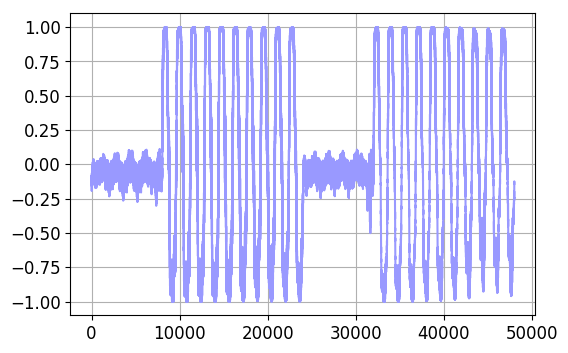

In [39]:
#print(len(in_z))
#print(len(samples))
no = 20
epch =6  #  4best
signalData = samples[epch][no] #770 BEST
print(signalData.shape)
plt.figure(dpi=100)
plt.grid(True)

#plt.plot(result[epch].flatten(),'#66ffcc')
plt.plot(signalData, '#9999ff')
#plt.plot(in_z[epch][no],'#000066',linestyle = '--')

ipd.Audio(result[epch].flatten(), rate = 16000)

(40, 48000, 1)


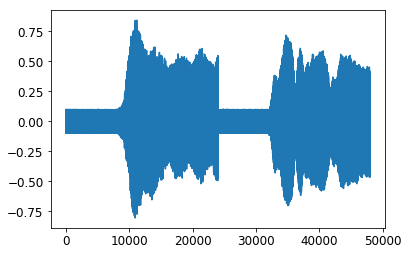

In [32]:
plt.plot(result[30])
print(result.shape)
ipd.Audio((result[30]).flatten(), rate=16000)
batch_N = np.random.uniform((-1*rng), (rng), size=(b_size,48000,1))
result = result + batch_N
        

In [ ]:
plt.figure(dpi=100)
plt.grid(True)
plt.plot(signalData, '#9999ff')
signalData.shape

In [ ]:
p_len = (signalData.flatten().shape)[0]
t_rsh = 0.75
p_lst =[]
flg=1
flg_ates =[]
for i in range(p_len):
    val = signalData[i]
    if (val > t_rsh or val < (t_rsh*(-1))):
        if(flg ==1):
            print("I was here first, at:",i)
            flg=0
        p_lst.append(val)
        flg_ates.append(i)
        
    else:
        p_lst.append(0)
print("Done")
    
    

In [ ]:
print(len(p_lst))
print(">> Start at:",flg_ates[0],"End at:",flg_ates[int(len(flg_ates))-1])


plt.figure(dpi=100)
plt.plot(signalData)
plt.plot(p_lst)


In [ ]:
# Set validatin set

n_sam_val = 500
val_filenames = []
dir_name = "../tfrec_flute/val/val_flute/"
st_num = "_1"

for file in os.listdir(dir_name):
    #if file.endswith(".tfrecords"):
    if st_num in file:
        
        val_filenames.append(os.path.join(dir_name, file))
        
print(len(val_filenames))
print(val_filenames)


In [ ]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    sess.run(iterator.initializer, feed_dict={filenames: val_filenames, batch_size: b_size, buffer_size: b_size*2,keep_prob_ :0.60, isTrain: True})
    for i in range(200):
        result, batch_z = sess.run([features,labels])

In [ ]:
print(len(result))
print(len(batch_z))
no =30

plt.plot(result[no].flatten())
plt.plot(batch_z[no].flatten())

In [ ]:

no = 12

epch = 176  #176 #116     #115 

# old  - #200 #168 #155

signalData = samples[epch][no] #770 BEST
print(signalData.shape)


noise = np.random.normal(0, (0.1), size=(48000))
plt.figure(dpi=150)
print(batch_z.shape)
plt.plot(result[0].flatten()+noise,'#66ffcc')
plt.plot(signalData, '#9999ff')
plt.plot(batch_z[0].flatten(),'#000066',linestyle = '--')




ims = plotstft(samples= signalData, samplerate = 16000)

ipd.Audio((signalData).flatten(), rate=16000)



In [ ]:
rng = 0.01
batch_N = np.random.uniform(-1*(rng), (rng), size=(48000,1))
plt.figure(dpi=150)
plt.plot(result[0])
plt.plot(batch_N.flatten())


In [ ]:
saver = tf.train.Saver(var_list=g_vars)
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('checkpoints4'))
    sess.run(tf.global_variables_initializer())

    sess.run(iterator.initializer, feed_dict={filenames: val_filenames, batch_size: 40, buffer_size: 1,keep_prob_ :1.00, isTrain: False})
    result, batch_z = sess.run([features,labels])
    print(">Result:",result.shape)
    gen_samples = sess.run(
                   generator(input_z, input_size, reuse=True),
                   feed_dict={input_z: result, isTrain: False, keep_prob_ : 1.00})

print(gen_samples.shape)

In [ ]:
print(len(result))
print(len(batch_z))
no = 2

signalData = batch_z[no] #770 BEST
print(signalData.shape)
plt.figure(dpi=100)
plt.grid(True)

#plt.plot(result[no],linestyle = '--')
#plt.plot(signalData,)
print(gen_samples[5].shape)
plt.plot(gen_samples[no])

In [ ]:
ipd.Audio(gen_samples[10].flatten(), rate = 16000)